In [1]:
import os
import tarfile
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.cluster import KMeans
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
import re

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
data_path = r"C:\Users\KIIT\Downloads\twenty+newsgroups.zip"
extracted_path = r"C:\Users\KIIT\Downloads\twenty+newsgroups"

In [4]:
if not os.path.exists(extracted_path):
    with tarfile.open(data_path, 'r:gz') as tar:
         tar.extractall(path=extracted_path)

In [5]:
category_path = os.path.join(extracted_path, r"C:\Users\KIIT\Downloads\misc.forsale")
documents = []
for file_name in os.listdir(category_path):
    file_path = os.path.join(category_path, file_name)
    with open(file_path, 'r', encoding='latin1') as file:
        documents.append(file.read())


In [6]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess(text):
   
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I|re.A)
    text = text.lower()
    text = text.strip()

    
    tokens = word_tokenize(text)

  
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

documents = [preprocess(doc) for doc in documents]

In [7]:
vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
X = vectorizer.fit_transform(documents)

lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X)

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 10
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)

Topic 0:
georgia institute technology pom gtcprismgatechedu gtaprismgatechedu hydragatechedu atlanta contains ralf
Topic 1:
rupindangdartmouthedu hanover newsdartvaxdartmouthedu dartmouth nh rupin dang uk amp manager
Topic 2:
steve keldsen lh sm dan research djkccwfccutexasedu steveaprroostertitantsdarlututexasedu texas glicker
Topic 3:
kou douglas hiram movie vhs custom live college barrel leepolarsunrnarockefelleredu
Topic 4:
sale miscforsale gmt university sender drive offer email nntppostinghost new
Topic 5:
bitzmcolumbiadsuedu eric hotel clemson voucher dakota typewriter sc bitz package
Topic 6:
brook writes stony bulletin commercial neal dennis york jack pchangicsunysbedu
Topic 7:
mile sega toyota brian oplingerracrdgecom car interior amfm genesis research
Topic 8:
nikon room writes junk camera andy aprlelandstanfordedu jumper mailing lens
Topic 9:
00 10 50 comic cover 15 copy 1st 20 25


In [8]:
num_clusters = 10
km = KMeans(n_clusters=num_clusters, random_state=42)
km.fit(X)
# Attach the cluster labels to the documents
df = pd.DataFrame({'Document': documents, 'Cluster': km.labels_})

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [9]:
print(df.head())
# Saving the clustering results to a CSV file
df.to_csv('document_clusters.csv', index=False)

                                            Document  Cluster
0  path cantaloupesrvcscmuedurochesterudelgatechh...        1
1  path cantaloupesrvcscmueducrabapplesrvcscmuedu...        3
2  path cantaloupesrvcscmuedudasnewsharvardeduogi...        5
3  newsgroups miscforsale path cantaloupesrvcscmu...        5
4  path cantaloupesrvcscmueducrabapplesrvcscmuedu...        1


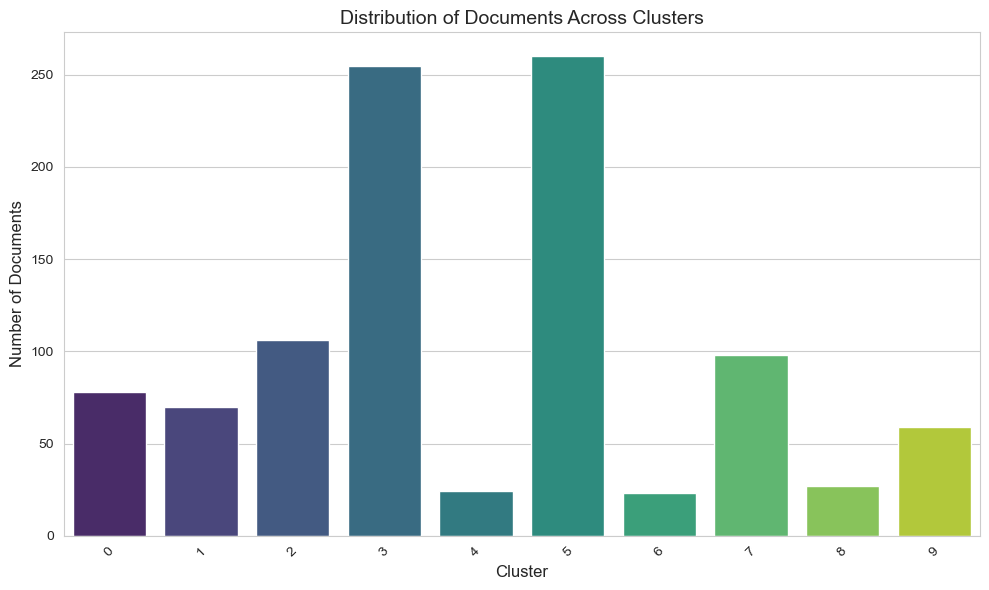

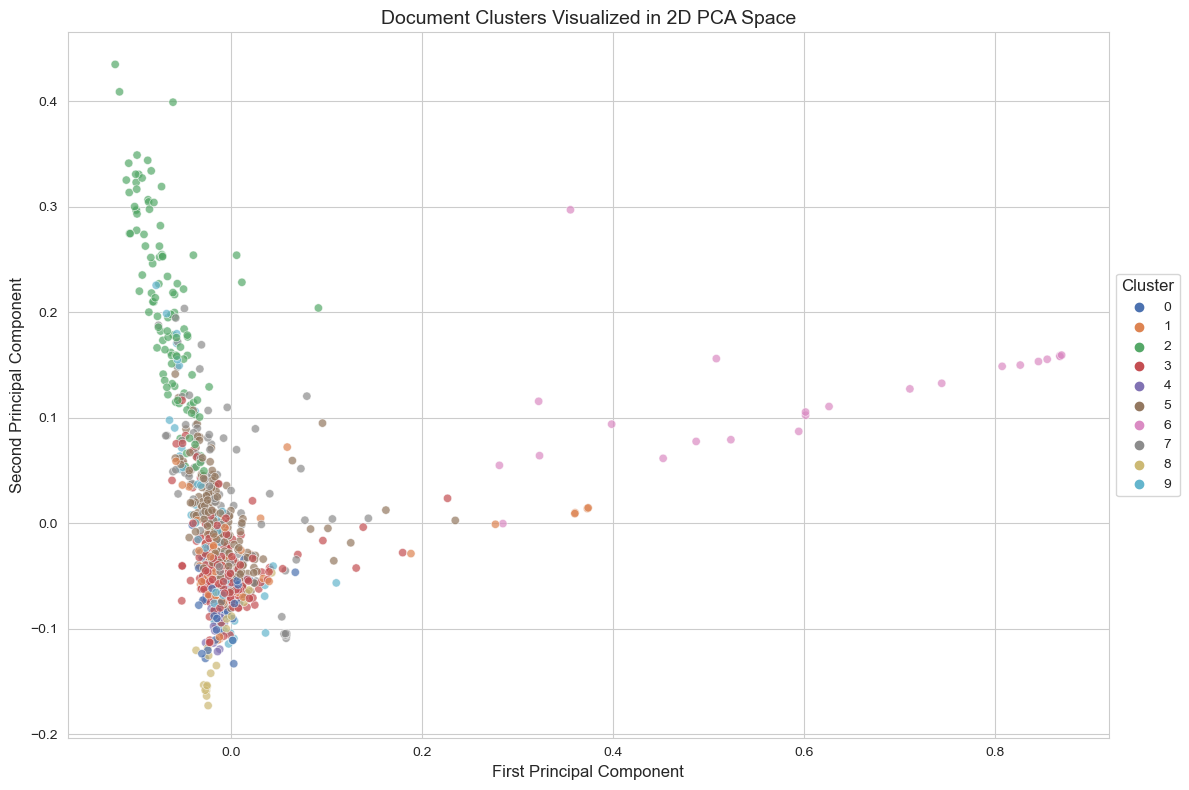

Explained variance ratio: [0.01152053 0.00929286]


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Set the style for Seaborn plots
sns.set_style("whitegrid")

# Plot 1: Document Clusters Bar Plot
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df, palette='viridis')
plt.xlabel('Cluster', fontsize=12)
plt.ylabel('Number of Documents', fontsize=12)
plt.title('Distribution of Documents Across Clusters', fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot 2: PCA Scatter Plot
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

plt.figure(figsize=(12, 8))
scatter = sns.scatterplot(x=X_reduced[:, 0], y=X_reduced[:, 1], 
                          hue=df['Cluster'], palette='deep', 
                          legend='full', alpha=0.7)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.title('Document Clusters Visualized in 2D PCA Space', fontsize=14)

# Improve legend
plt.legend(title='Cluster', title_fontsize='12', fontsize='10', loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

# Print explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")